# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

* catboost.__version__ == 1.1.1
* matplotlib.__version__ == 3.5.3
* sklearn.__version__ == 0.21.0
* pandas.__version__ == 1.3.1
* numpy.__version__ == 1.19.5

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
#!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
#!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
#!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
print(data.shape)
data.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


#### Анализ числовых переменных

In [7]:
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

In [8]:
sorted(data.TotalSpent.unique())[:5]

[' ', '100.2', '100.25', '100.35', '100.4']

* Необходимо избавиться от ' ' заменив их на np.nan и задать тип float для численной переменной

In [9]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: np.nan if x == ' ' else np.float(x))
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent         float64
dtype: object

#### Анализ категориальных переменных

In [10]:
data[cat_cols].dtypes

Sex                         object
IsSeniorCitizen              int64
HasPartner                  object
HasChild                    object
HasPhoneService             object
HasMultiplePhoneNumbers     object
HasInternetService          object
HasOnlineSecurityService    object
HasOnlineBackup             object
HasDeviceProtection         object
HasTechSupportAccess        object
HasOnlineTV                 object
HasMovieSubscription        object
HasContractPhone            object
IsBillingPaperless          object
PaymentMethod               object
dtype: object

In [11]:
(data
 .isna()
 .sum()
 .reset_index()
 .rename(columns={'index':'feature'
                  ,0:'cnt_of_nans'}
        )
 .sort_values('cnt_of_nans'
              ,ascending=False))

,feature,cnt_of_nans
2,TotalSpent,9
0,ClientPeriod,0
11,HasOnlineBackup,0
18,PaymentMethod,0
17,IsBillingPaperless,0
16,HasContractPhone,0
15,HasMovieSubscription,0
14,HasOnlineTV,0
13,HasTechSupportAccess,0
12,HasDeviceProtection,0


In [12]:
# Заменяем пропуски на медианное значение, так как оно усточиво к выбросам

data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())

---
## Выводы по первой части: 
* Необходимо избавиться от спец значений '' в переменной TotalSpent и привести ее к численному типу
* Замена спец значений '' в переменной TotalSpent приводит по пропускам np.nan, поэтому пропуски заполняем медианным значением. Данный вид заполнения более устойчив к выбросам
---

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

---
### 1) Решение:

#### 1.1 Численные признаки:

In [13]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2289.889086
std,24.550326,30.176464,2267.371263
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.587500
50%,29.000000,70.400000,1410.250000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


#### 1.1.1. Гистаграмма для численных признаков

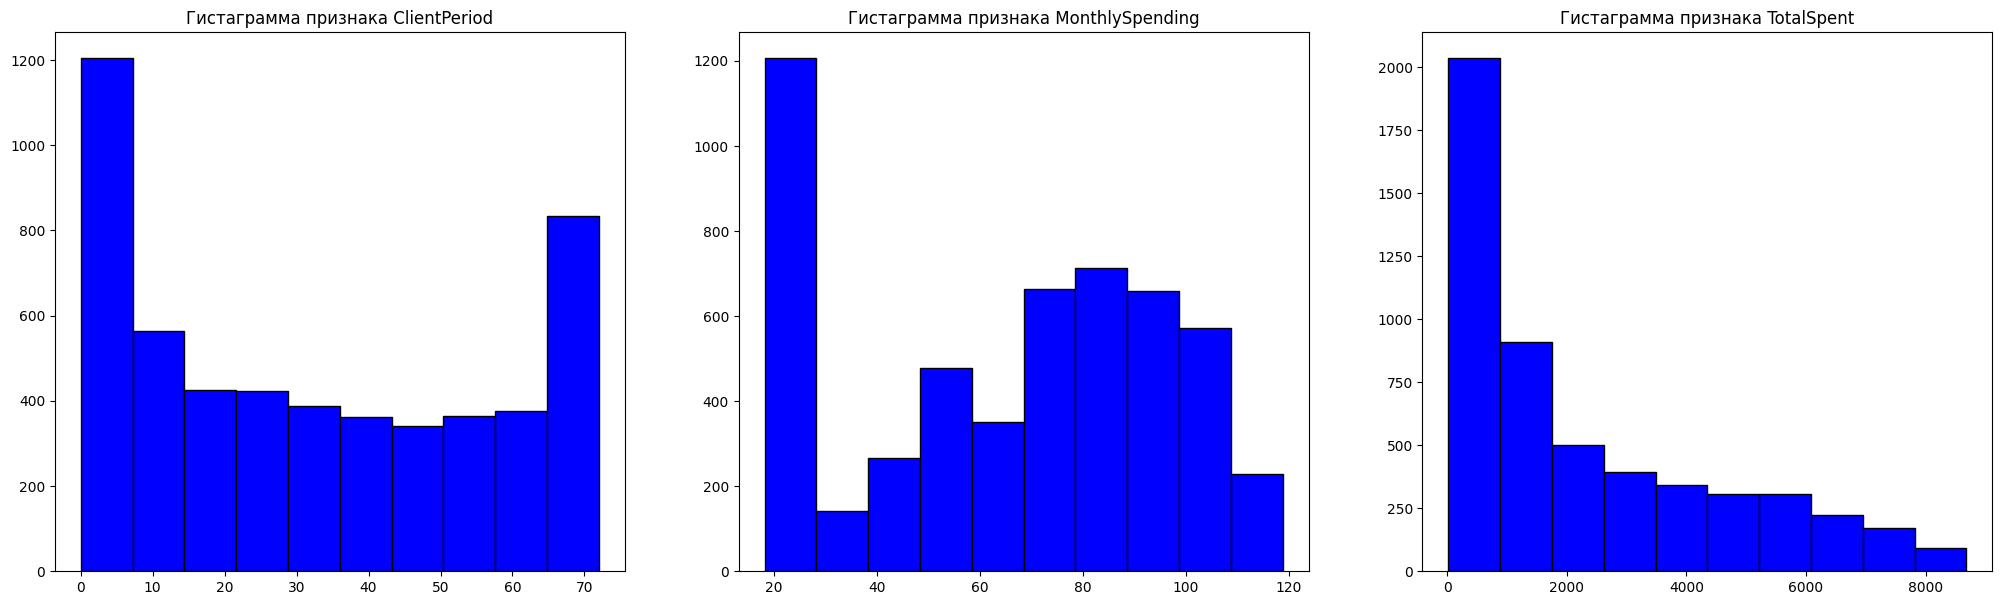

In [14]:
count=1
plt.figure(figsize=[25,7])
ncols = 3
nrows = np.int(np.ceil(len(num_cols)/ncols))
for i in num_cols:
    
    plt.subplot(nrows,ncols,count)
    plt.hist(data[i], color = 'blue', edgecolor = 'black')
    plt.title(f'Гистаграмма признака {i}')
    
    count+=1
    
plt.show()

#### 1.1.2. Ящик с усами (boxplot) для численных признаков

* Для корректной работы boxplot графика необходимо избавиться от пропусков, поэтому заполню 9 пустых значений фактора TotalSpent медианным значением (более устойчиво к выбросам)

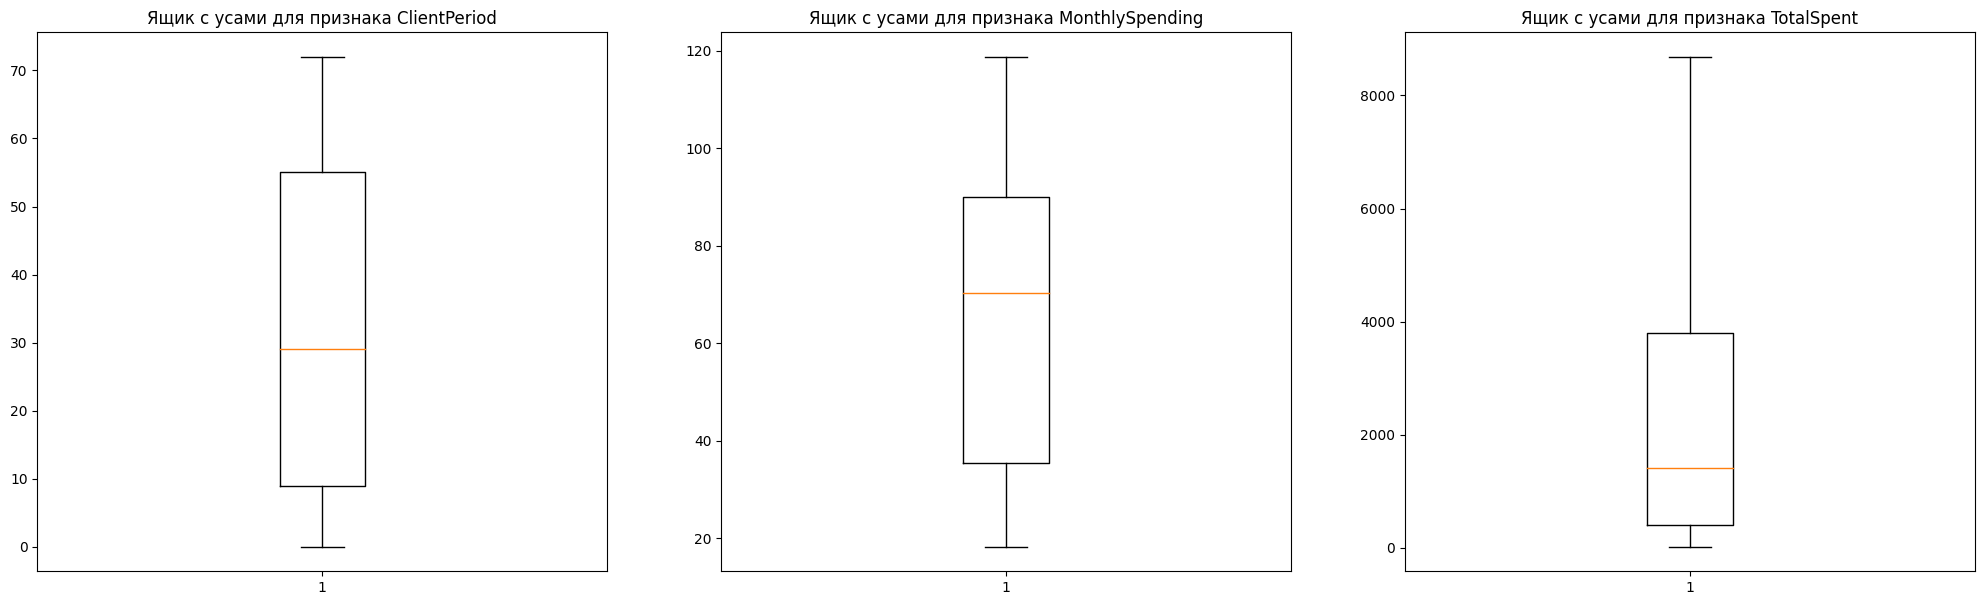

In [15]:
count=1
plt.figure(figsize=[25,7])
ncols = 3
nrows = np.int(np.ceil(len(num_cols)/ncols))
for i in num_cols:
    plt.subplot(nrows,ncols,count)
    plt.boxplot(data[i].fillna(data[i].median()))
    plt.title(f'Ящик с усами для признака {i}')
    
    count+=1
    
plt.show()

#### 1.2. Расчет количества для каждого категориального признака

In [16]:
for i in cat_cols:
    print(f'Исследуемый признак {i}')
    display(data[i].value_counts())
    print('-'*100)

Исследуемый признак Sex


Male      2655
Female    2627
Name: Sex, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак IsSeniorCitizen


0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasPartner


No     2705
Yes    2577
Name: HasPartner, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasChild


No     3676
Yes    1606
Name: HasChild, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasPhoneService


Yes    4761
No      521
Name: HasPhoneService, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasMultiplePhoneNumbers


No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasInternetService


Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasOnlineSecurityService


No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasOnlineBackup


No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasDeviceProtection


No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasTechSupportAccess


No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasOnlineTV


No                     2099
Yes                    2042
No internet service    1141
Name: HasOnlineTV, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasMovieSubscription


No                     2081
Yes                    2060
No internet service    1141
Name: HasMovieSubscription, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак HasContractPhone


Month-to-month    2920
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак IsBillingPaperless


Yes    3148
No     2134
Name: IsBillingPaperless, dtype: int64

----------------------------------------------------------------------------------------------------
Исследуемый признак PaymentMethod


Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64

----------------------------------------------------------------------------------------------------


#### 1.2.1 Диаграммы для категориальных признаков plt.bar

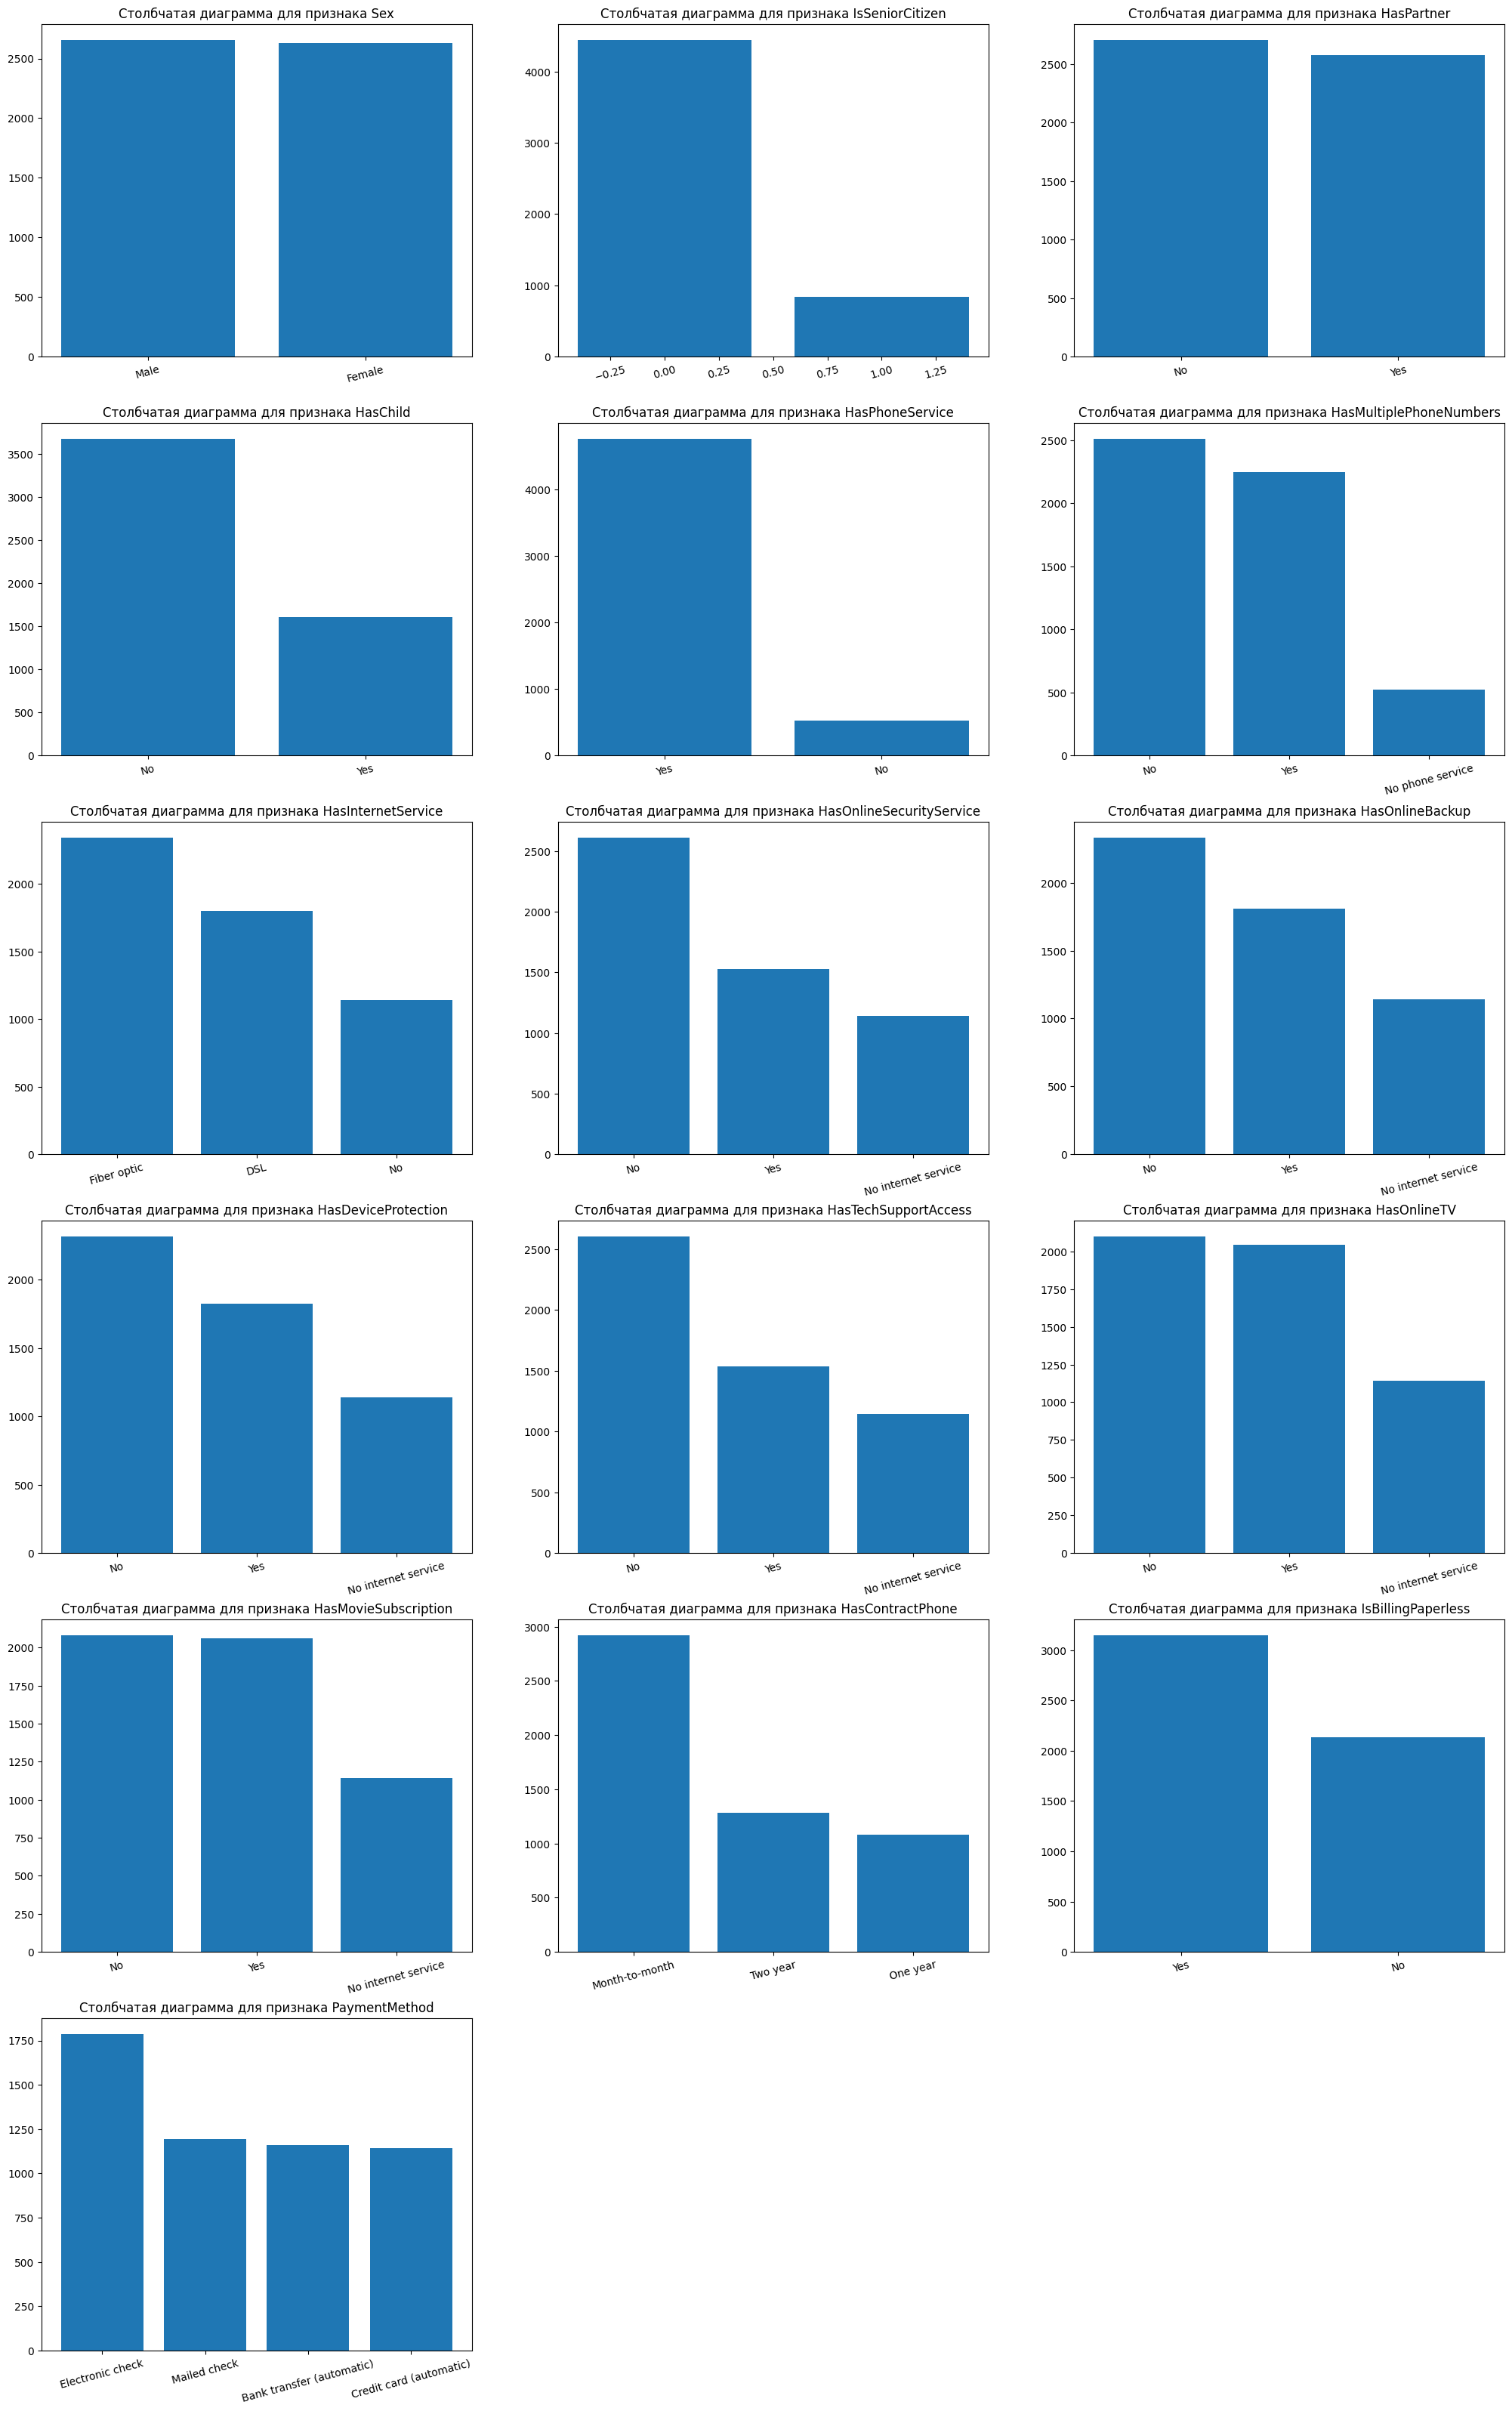

In [17]:
count=1
plt.figure(figsize=[25,40])
ncols = 3
nrows = np.int(np.ceil(len(cat_cols)/ncols))
for i in cat_cols:
    plt.subplot(nrows,ncols,count)
    plt.bar(data[i].value_counts().index,data[i].value_counts().values)
    plt.title(f'Столбчатая диаграмма для признака {i}')
    plt.xticks(rotation=15)
    
    count+=1
    
plt.show()

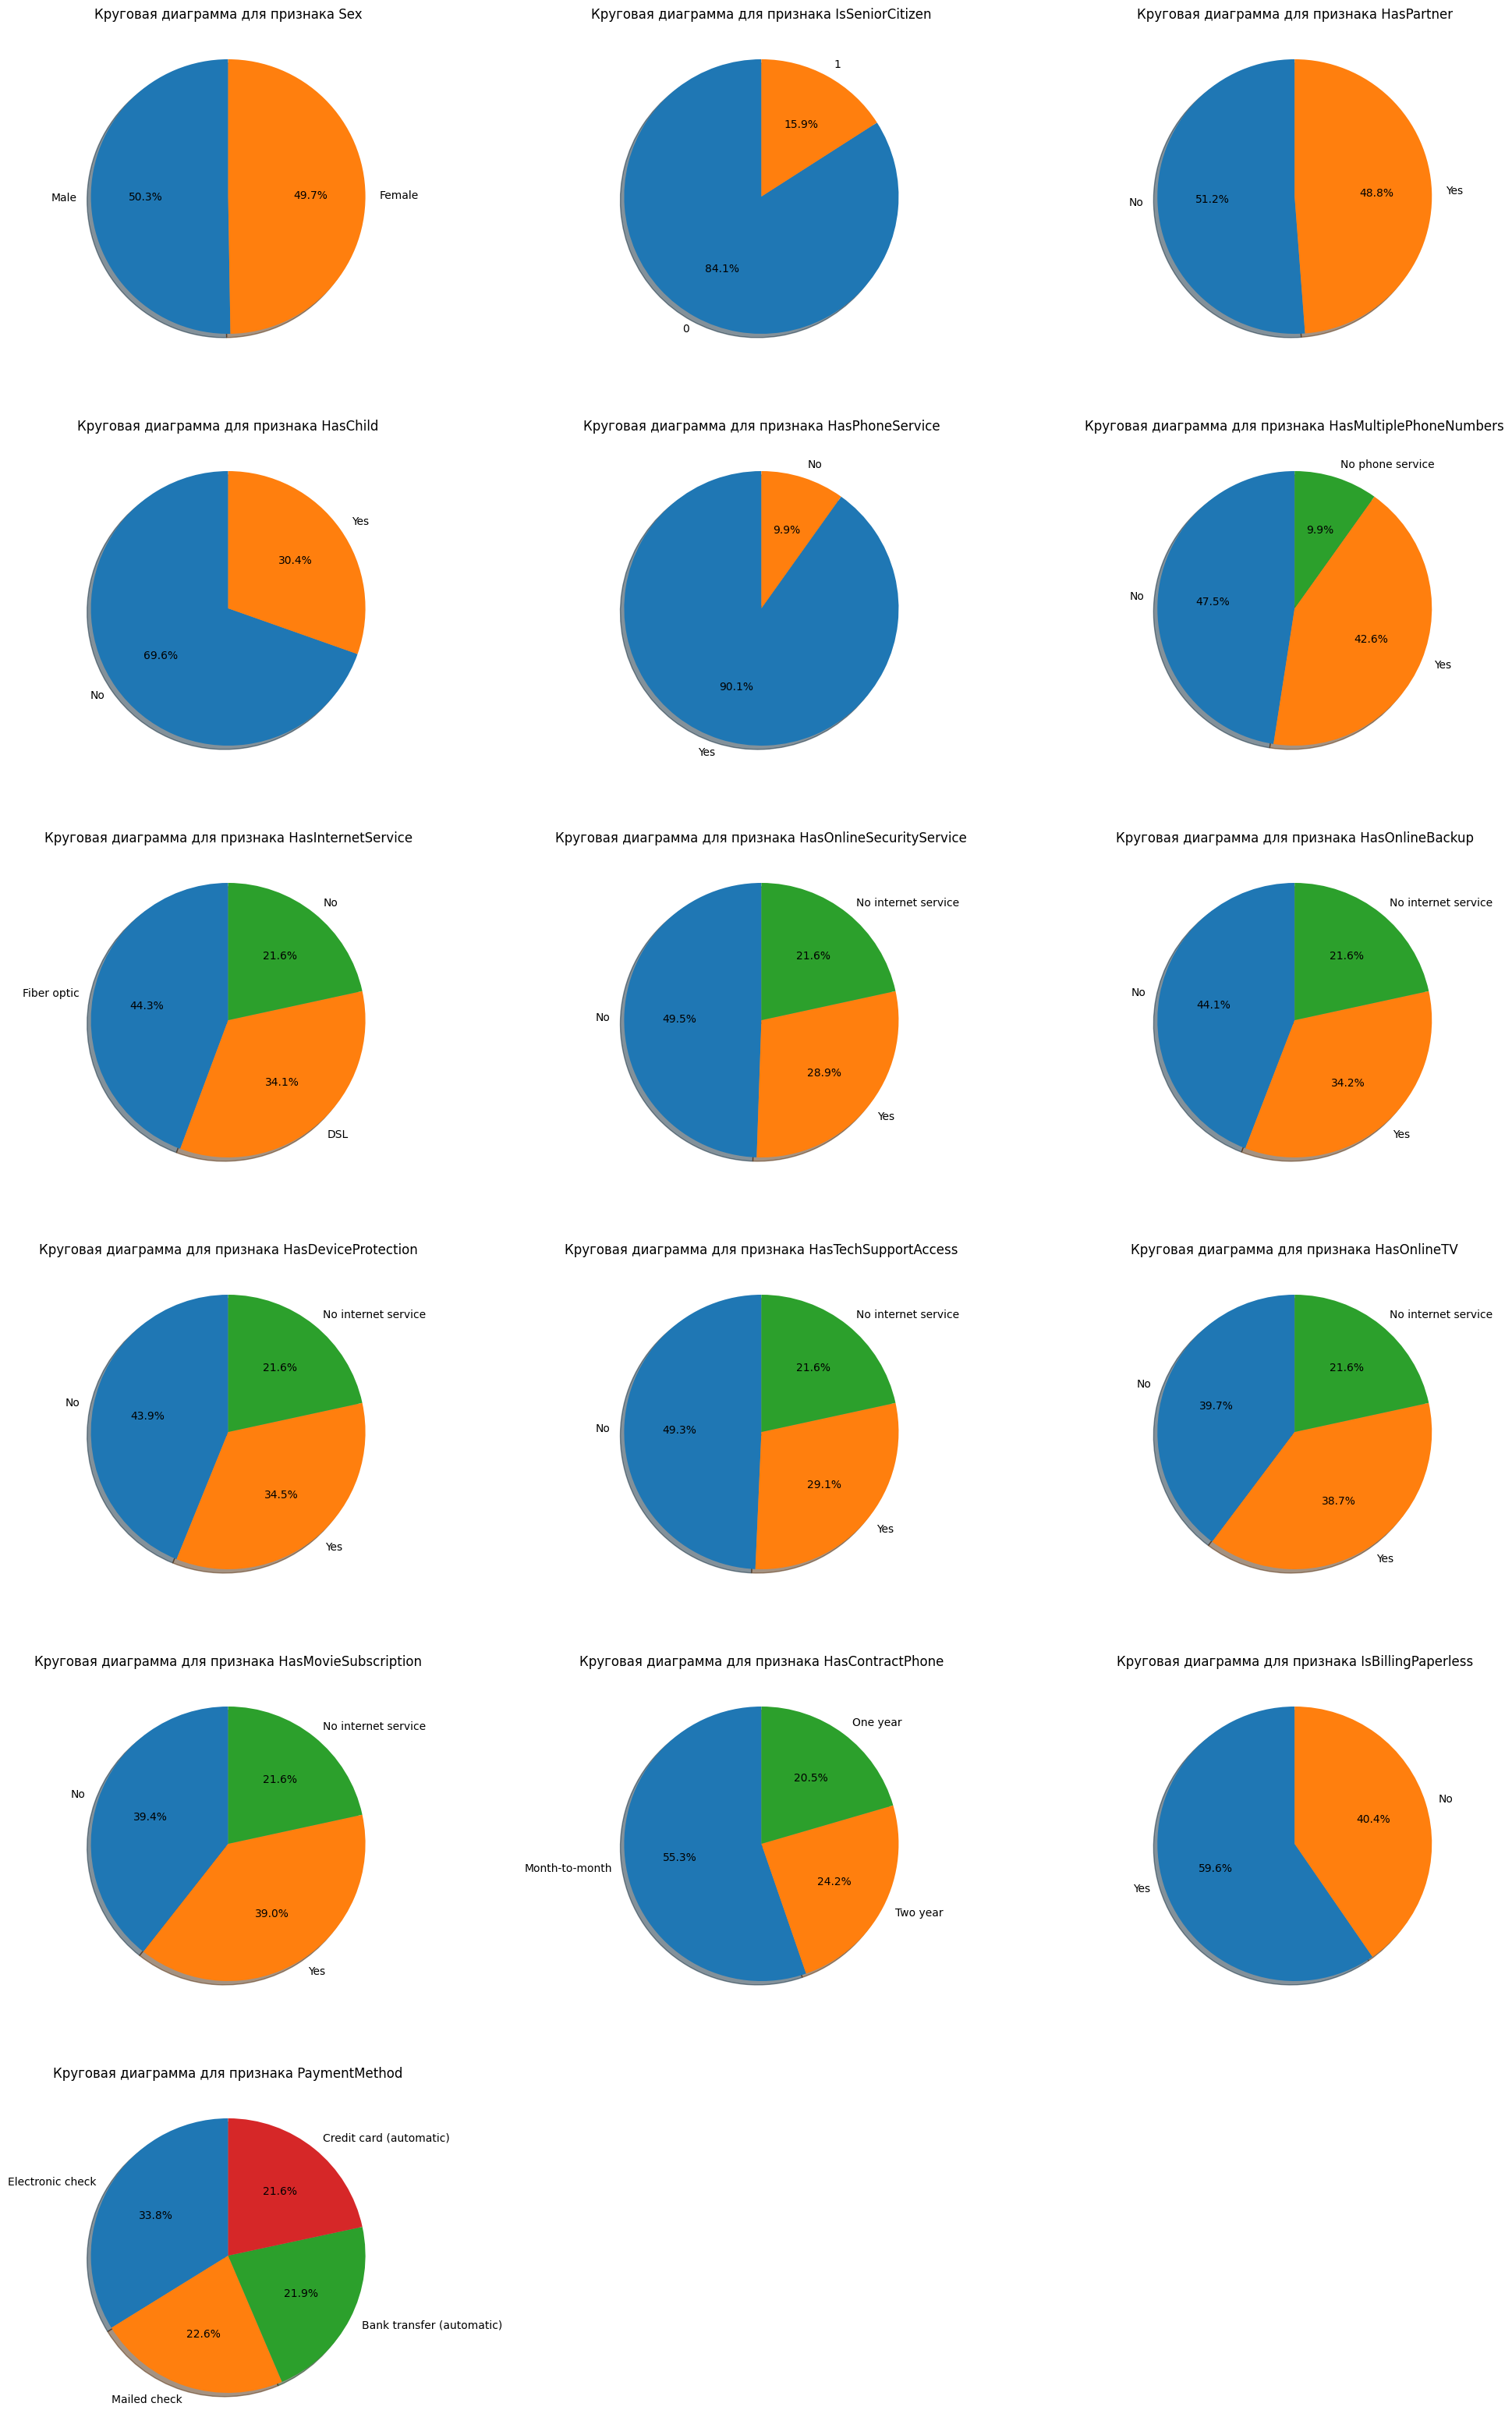

In [18]:
count=1
plt.figure(figsize=[25,40])
ncols = 3
nrows = np.int(np.ceil(len(cat_cols)/ncols))
for i in cat_cols:
    plt.subplot(nrows,ncols,count)
    plt.pie(x=data[i].value_counts().values,
            labels=data[i].value_counts().index,
            startangle=90,
            autopct='%1.1f%%',
            shadow=True
           )
    plt.title(f'Круговая диаграмма для признака {i}')
    
    count+=1
    
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### 2) Решение:

In [19]:
# Количество значений в целевой переменной и их доля

data[target_col].value_counts(), data[target_col].value_counts(normalize=True)

(0    3898
 1    1384
 Name: Churn, dtype: int64,
 0    0.737978
 1    0.262022
 Name: Churn, dtype: float64)

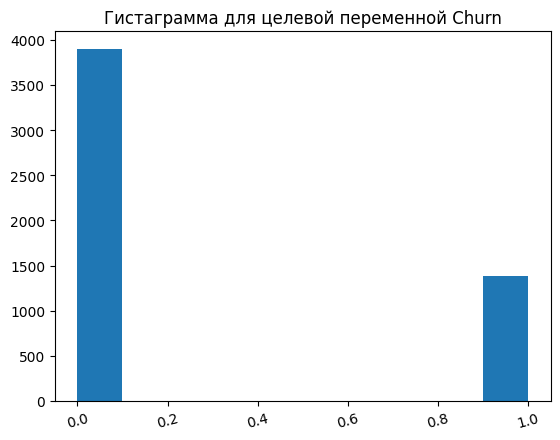

In [20]:
# Гистаграмма по целевой переменной

plt.hist(data[target_col])
plt.title(f'Гистаграмма для целевой переменной {target_col}')
plt.xticks(rotation=15)
plt.show()

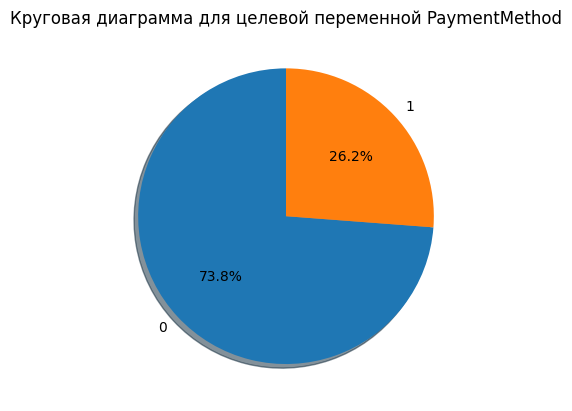

In [21]:
# Круговая диаграмма

plt.pie(x=data[target_col].value_counts().values,
        labels=data[target_col].value_counts().index,
        startangle=90,
        autopct='%1.1f%%',
        shadow=True
       )
plt.title(f'Круговая диаграмма для целевой переменной {i}')
plt.show()

---
## Выводы по второй части: 
* Выбросов как таковых незамечено, пропуски были обработаны в первой части
* Присутствует смещение в двух категориальных признаках таких как: IsSeniorCitizen и HasPhoneService.
* Целевая переменная - несбалансирована. Количество меток = 0 почти в 3 раза больше, чем меток = 1 (~74% и ~26% соответственно). Таким образом для при обучении алгоритмов в валидационой метрике лучше использовать ROC-AUC, Gini или F-score.
---

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [23]:
# Разделим нашу выборку на трейн / валид в соотношении 75 / 25 
# Это необходимо для тестрирования стабильности наших алгоритмов и детекции переобучения

train, valid = train_test_split(data, test_size=0.25, random_state=42)
train, valid = train.reset_index(drop=True), valid.reset_index(drop=True)

print(train.shape, valid.shape)

(3961, 20) (1321, 20)


### 1) Решение:

In [24]:
# Для числовых фичей обучим StandartScaler

scl = StandardScaler()
scl.fit(train[num_cols])

train[[f'{i}_sc' for i in num_cols]] = scl.transform(train[num_cols])
valid[[f'{i}_sc' for i in num_cols]] = scl.transform(valid[num_cols])

In [25]:
# Для категориальных фичей обучим OHE

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(train[cat_cols])

train = train.join(pd.DataFrame(ohe.transform(train[cat_cols]),columns=ohe.get_feature_names()))
valid = valid.join(pd.DataFrame(ohe.transform(valid[cat_cols]),columns=ohe.get_feature_names()))

In [26]:
train.head(2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,x12_Yes,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check
0,18,73.15,1305.95,Male,0,Yes,No,Yes,Yes,Fiber optic,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,72,89.10,6352.40,Female,1,Yes,No,Yes,Yes,DSL,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# Создадим лист полученных факторов

cols = [f'{i}_sc' for i in num_cols] + ohe.get_feature_names().tolist()
len(cols)

46

### 2) Решение:

In [28]:
# Зададим алгоритм и его сетку гиперпараметров
params_logreg = {'random_state':42}
model_logreg = LogisticRegression(**params_logreg)
param_name = 'C'
grid = [100, 10, 1, 0.1, 0.01, 0.001]
parameters = {param_name:grid}
parameters

{'C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [29]:
CV_model_logreg = GridSearchCV(estimator=model_logreg,
                               param_grid=parameters,
                               cv=3,
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=0
                              )

CV_model_logreg.fit(train[cols], train[target_col])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [30]:
# Среднее значение метрики ROC-AUC на test множествe

means = CV_model_logreg.cv_results_['mean_test_score']
means

array([0.85084546, 0.85086407, 0.85034876, 0.84904923, 0.84708481,
       0.84344704])

In [31]:
# Стандартные отклонения метрики ROC-AUC на test множествe

error = CV_model_logreg.cv_results_['std_test_score']
error

array([0.01197793, 0.01225825, 0.01281805, 0.01376135, 0.01541958,
       0.01660463])

In [32]:
# Лучшее значение параметра С в LogisticRegression на нашем датасете

CV_model_logreg.best_params_

{'C': 10}

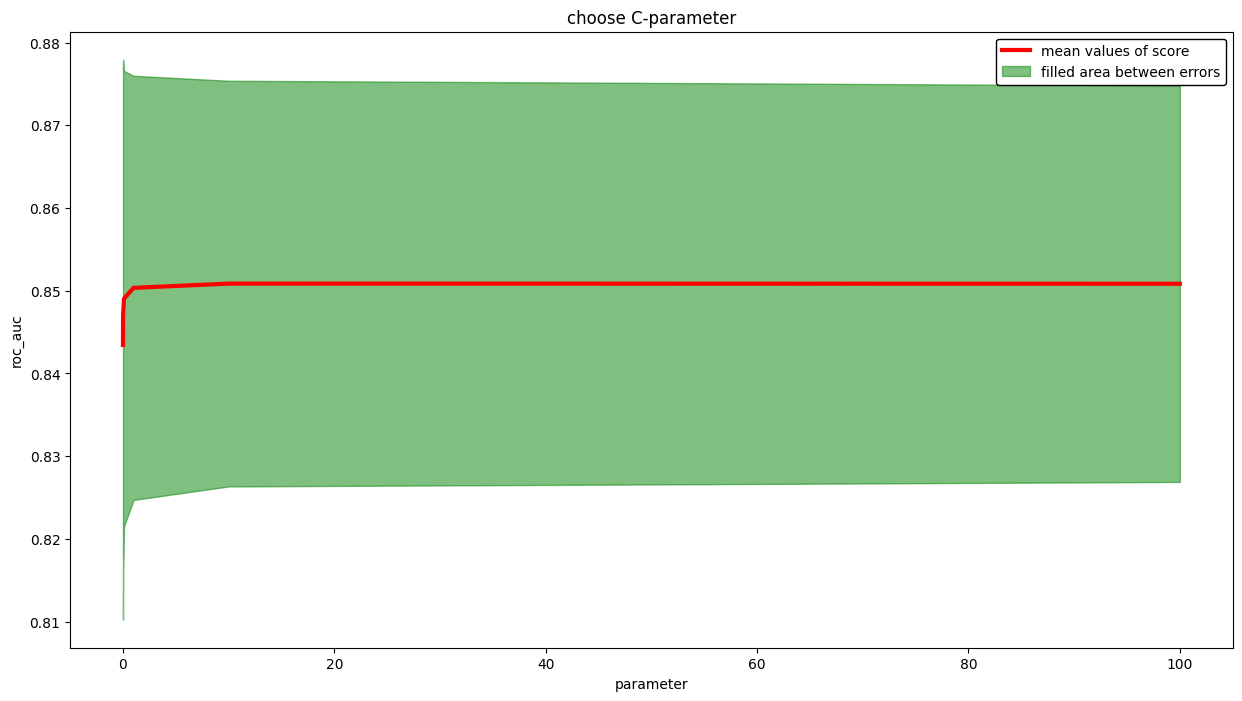

In [33]:
# Отрисуем изменение метрики ROC-AUC при изменении параметра С

plt.figure(figsize=(15,8))
plt.title(f'choose {param_name}-parameter')

plt.plot(grid, means, label='mean values of score', color='red', lw=3)

plt.fill_between(grid, means - 2 * error, means + 2 * error,
                 color='green', label='filled area between errors', alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('parameter')
plt.ylabel('roc_auc')
plt.show()

In [34]:
# Используя подобранные параметры обучим модель на train множестве и применим на valid множестве для проверки
params_logreg.update(CV_model_logreg.best_params_)

best_logreg = LogisticRegression(**params_logreg)

best_logreg.fit(train[cols], train[target_col])
y_train_predicted = best_logreg.predict_proba(train[cols])[:, 1]
y_valid_predicted = best_logreg.predict_proba(valid[cols])[:, 1]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


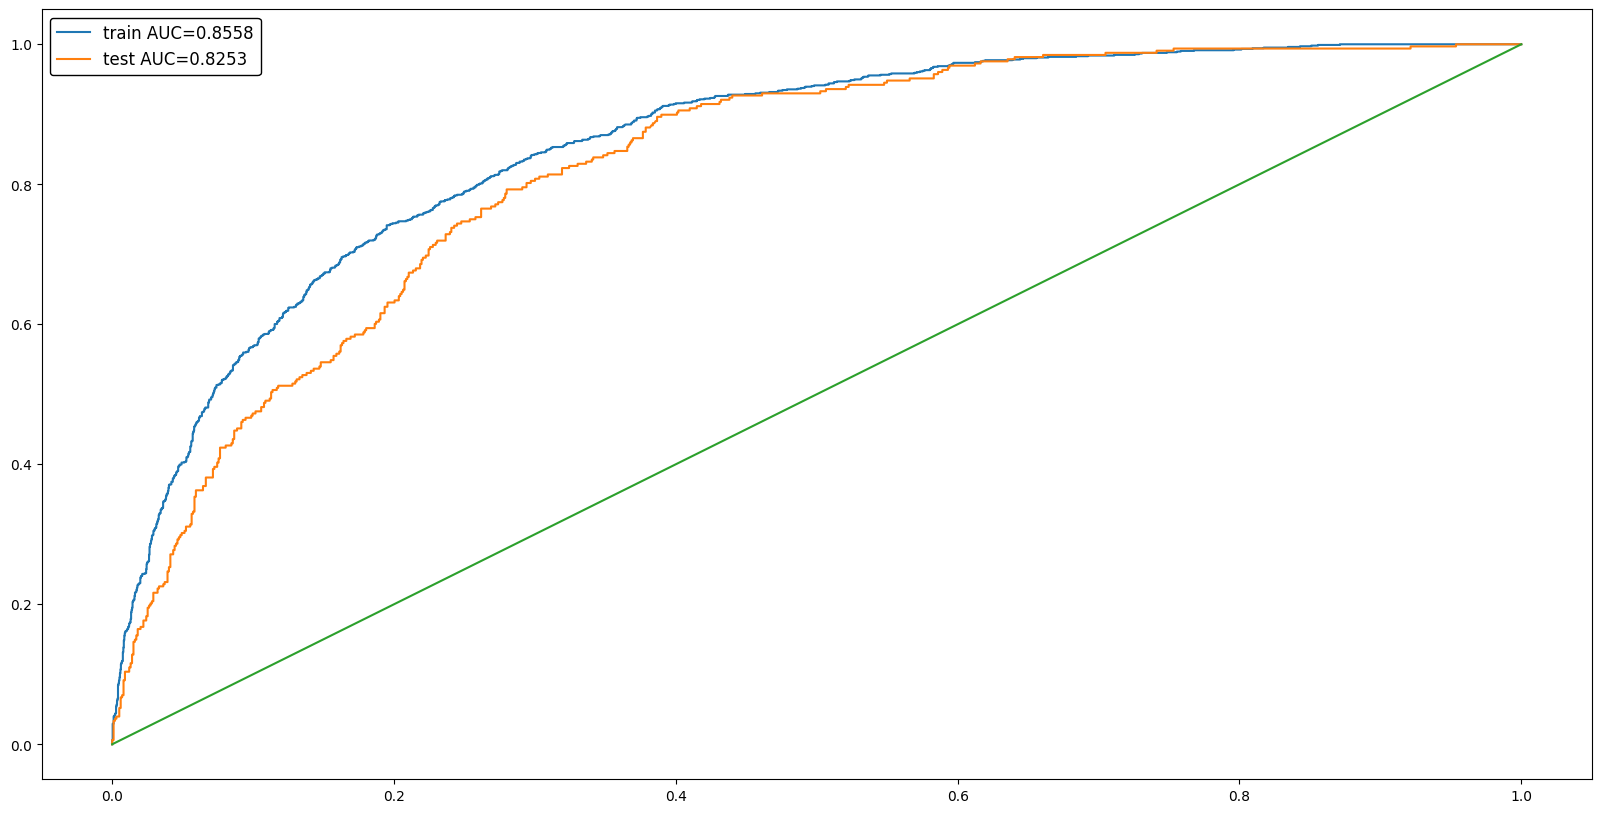

In [35]:
# Рассчитаем ROC-AUC и отрисуем ROC curve обученной модели

from sklearn.metrics import roc_curve

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

---
## Выводы по третьей части: 

* Использовал модель логистической регрессии
* Для поиска гиперпараметров использовал GridSearchCV с разбиением на 3 фолда с сеткой параметров {'C':[100, 10, 1, 0.1, 0.01, 0.001]}
* Оптимальным значением параметра оказалось C=10
* ROC-AUC на трейн множестве показал значение 85,58%
* ROC-AUC на валидационном множестве показал значение 82,53%
---
- Данные значения метрики, а также ее незначительного снижения говорят о стабильности и высоком качестве модели

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### 1) Решение:

In [36]:
import catboost as ctb

In [37]:
# Тренировочная ыборка была разделена во второй части ДЗ на train/valid.
## Обучим и применим базовую модель CatBoostClassifier

params_ctb = {'random_state':42}

base_ctb = ctb.CatBoostClassifier(**params_ctb)

base_ctb.fit(X=train[feature_cols],
              y=train[target_col],
              cat_features=cat_cols,
              eval_set=(valid[feature_cols], valid[target_col]),
              use_best_model=True,
              verbose=100
             )

Learning rate set to 0.044521
0:	learn: 0.6640756	test: 0.6660266	best: 0.6660266 (0)	total: 67.6ms	remaining: 1m 7s
100:	learn: 0.3790022	test: 0.4250314	best: 0.4250314 (100)	total: 892ms	remaining: 7.94s
200:	learn: 0.3595736	test: 0.4244755	best: 0.4243213 (120)	total: 1.66s	remaining: 6.6s
300:	learn: 0.3362700	test: 0.4262784	best: 0.4243213 (120)	total: 2.58s	remaining: 6s
400:	learn: 0.3185888	test: 0.4295369	best: 0.4243213 (120)	total: 3.41s	remaining: 5.09s
500:	learn: 0.3008399	test: 0.4342951	best: 0.4243213 (120)	total: 4.3s	remaining: 4.29s
600:	learn: 0.2846825	test: 0.4385138	best: 0.4243213 (120)	total: 5.09s	remaining: 3.38s
700:	learn: 0.2700030	test: 0.4437652	best: 0.4243213 (120)	total: 5.96s	remaining: 2.54s
800:	learn: 0.2566595	test: 0.4454575	best: 0.4243213 (120)	total: 6.81s	remaining: 1.69s
900:	learn: 0.2450849	test: 0.4492039	best: 0.4243213 (120)	total: 7.7s	remaining: 846ms
999:	learn: 0.2335465	test: 0.4521988	best: 0.4243213 (120)	total: 8.65s	remain

In [38]:
# Лучшее количество итераций:

base_ctb.best_iteration_

120

Learning rate set to 0.129595
0:	learn: 0.6461615	total: 5.1ms	remaining: 607ms
100:	learn: 0.3772529	total: 314ms	remaining: 59.2ms
119:	learn: 0.3752863	total: 371ms	remaining: 0us


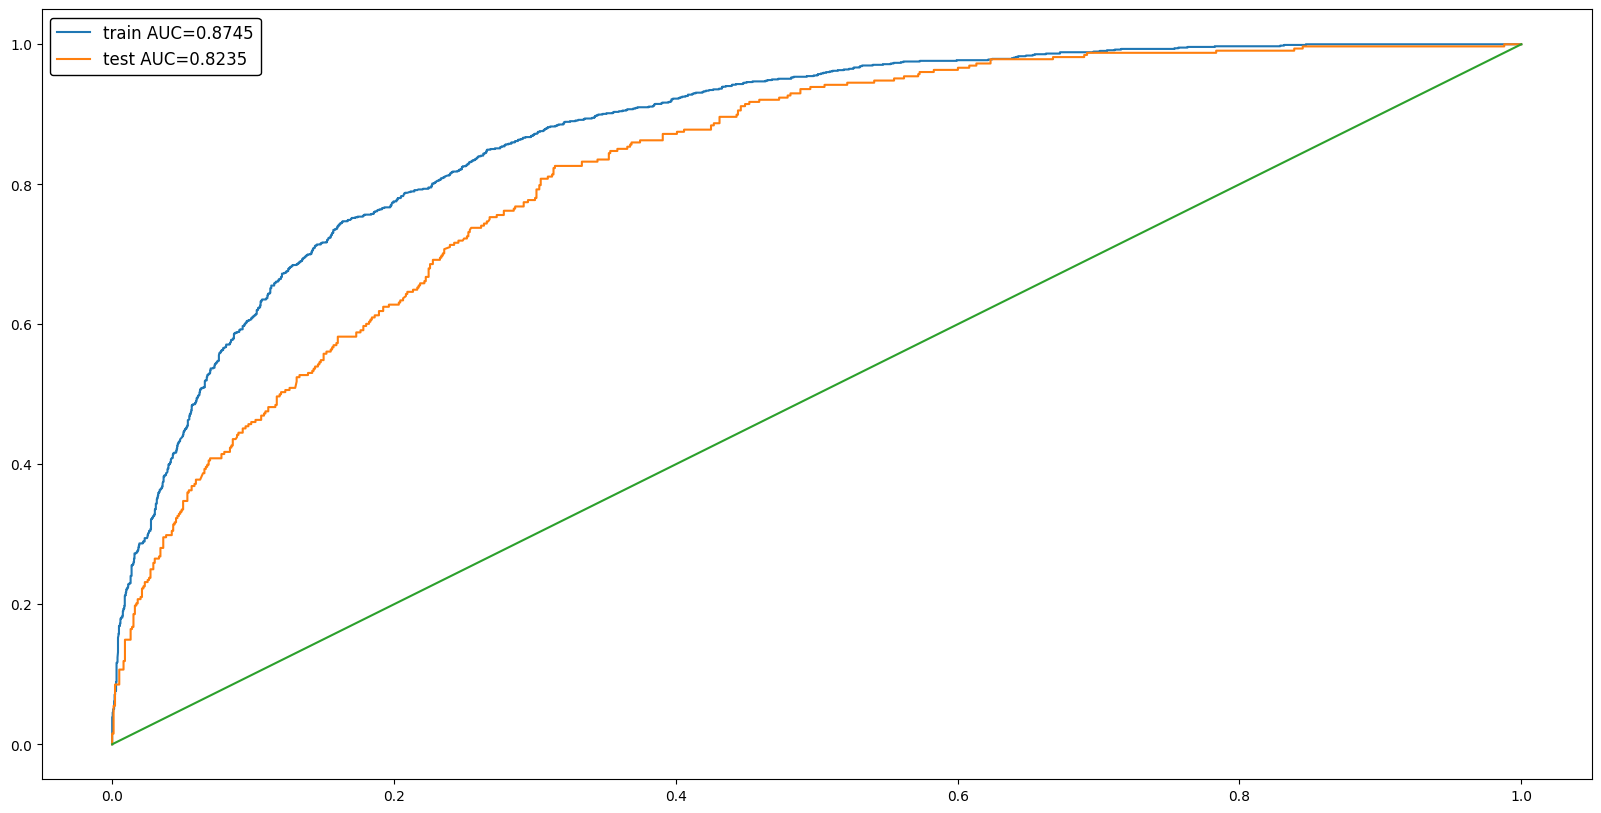

In [39]:
# Обновляем параметры кэтбуста, обучаем и применяем на валидационном множестве

params_ctb['iterations'] = base_ctb.best_iteration_

base_ctb = ctb.CatBoostClassifier(**params_ctb)
base_ctb.fit(X=train[feature_cols],
             y=train[target_col],
             cat_features=cat_cols,
             verbose=100
            )

y_train_predicted = base_ctb.predict_proba(train[feature_cols])[:, 1]
y_valid_predicted = base_ctb.predict_proba(valid[feature_cols])[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

* По графику видно переобучение, метрика падает более чем на 5% в абсолютной величине между train и valid множествах. Необходимо регуляризовать

### 2) Решение:

In [40]:
# Для борьбы с переобучением:
## Запустим поиск гиперпараметров с использованием оригинальных количественных фичей и OHE для категориальных
### Будем использовать GridSearchCV с метрикой ROC-AUC

model_ctb = ctb.CatBoostClassifier()
params_ctb = {'iterations': [500],
              'depth': [4, 5, 6],
              'learning_rate':[0.01,0.03,0.05],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'subsample':[0.6,0.9],
              'l2_leaf_reg': [3,1,5,10,100],
              'logging_level':['Silent'],
              'random_seed': [42]
         }

CV_model_ctb = GridSearchCV(estimator=model_ctb, 
                        param_grid=params_ctb, 
                        cv=3,
                        scoring='roc_auc', 
                        n_jobs=-1,
                        verbose=0
                       )

ctb_cols = num_cols + ohe.get_feature_names().tolist()

In [41]:
%%time

CV_model_ctb.fit(train[ctb_cols],train[target_col])

CPU times: user 4 s, sys: 278 ms, total: 4.28 s
Wall time: 4min 7s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd1a484aa50>,
             iid='warn', n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'l2_leaf_reg': [3, 1, 5, 10, 100],
                         'learning_rate': [0.01, 0.03, 0.05],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss', 'CrossEntropy'],
                         'random_seed': [42], 'subsample': [0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [42]:
#last parameters

#{'depth': 4,
# 'iterations': 500,
# 'l2_leaf_reg': 1e-20,
# 'learning_rate': 0.01,
# 'logging_level': 'Silent',
# 'loss_function': 'Logloss',
# 'random_seed': 42}

In [43]:
## Оптимальные значения параметров

CV_model_ctb.best_params_

{'depth': 4,
 'iterations': 500,
 'l2_leaf_reg': 100,
 'learning_rate': 0.03,
 'logging_level': 'Silent',
 'loss_function': 'Logloss',
 'random_seed': 42,
 'subsample': 0.9}

In [44]:
# Обновим параметры до оптимальных и запустим модель с обучением и проверкой на eval_set по метрике AUC

params_ctb = {'eval_metric':'AUC',
              'thread_count':-1,
              'depth': 4,
              'iterations': 500,
              'l2_leaf_reg': 100,
              'learning_rate': 0.03,
              'logging_level': 'Silent',
              'loss_function': 'Logloss',
              'random_seed': 42,
              'subsample': 0.9
             }

model_ctb = ctb.CatBoostClassifier(**params_ctb)

model_ctb.fit(X=train[feature_cols],
              y=train[target_col],
              cat_features=cat_cols,
              eval_set=(valid[feature_cols], valid[target_col]),
              early_stopping_rounds=150,
              use_best_model=True
             )

In [45]:
# Обновляем количество итераций по критерию остановы и обучаем финальную модель CatBoostClassifier

params_ctb['iterations'] = model_ctb.best_iteration_

best_ctb = ctb.CatBoostClassifier(**params_ctb)
best_ctb.fit(X=train[feature_cols],
             y=train[target_col],
             cat_features=cat_cols
            )

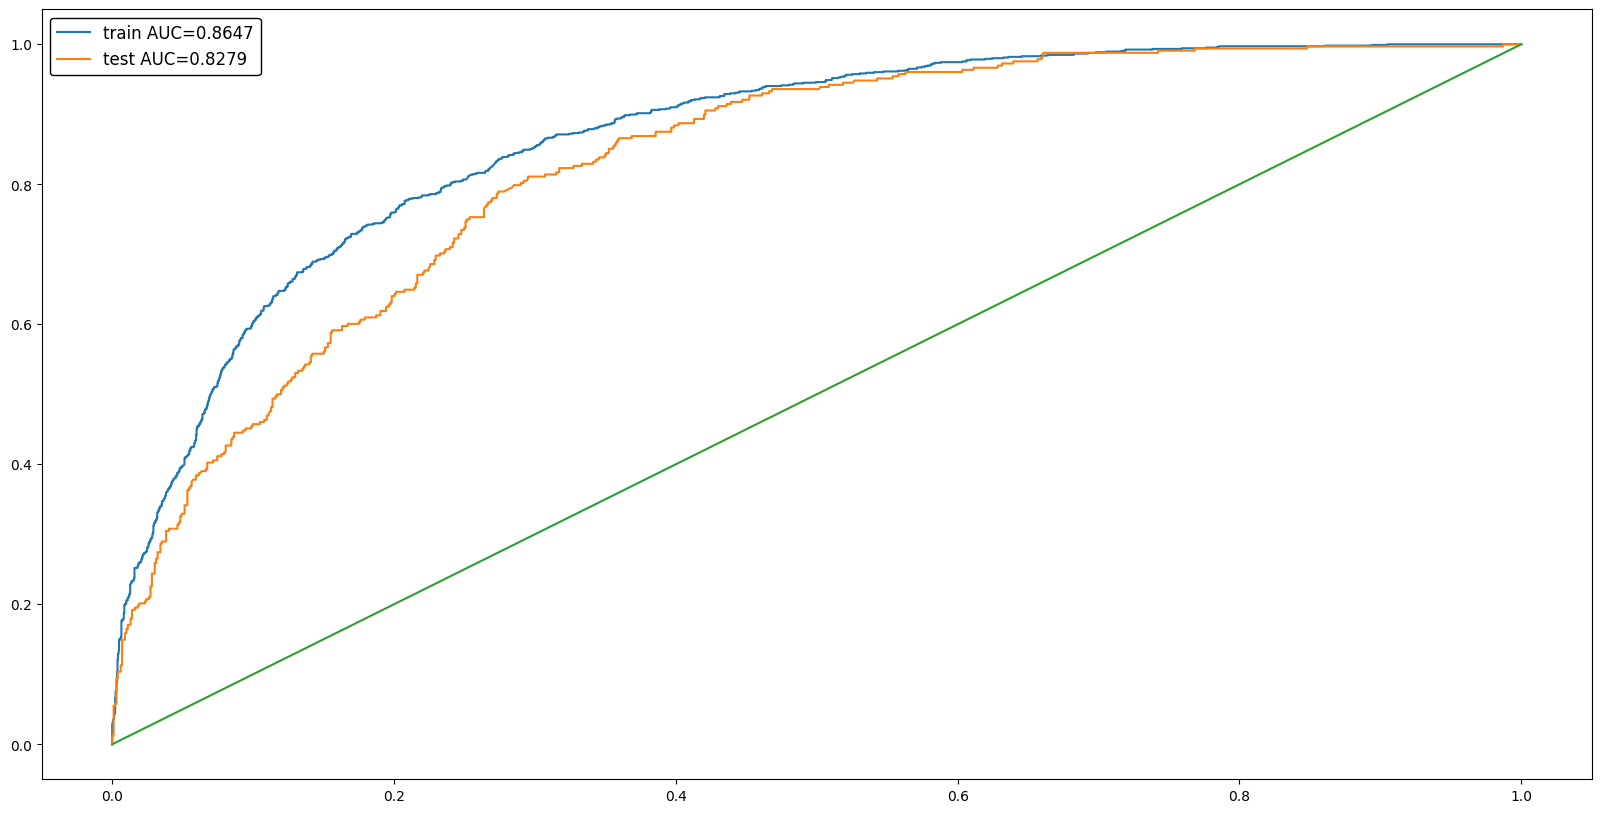

In [46]:
# Отрисовываем метрики по обученной модели

y_train_predicted = best_ctb.predict_proba(train[feature_cols])[:, 1]
y_valid_predicted = best_ctb.predict_proba(valid[feature_cols])[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

---
#### Выводы CatBoost: 

* Подобрал гиперпараметры регуляризации с помощью GrichSearchCV, далее лучшее количество итераций с использованием критерия остановы по валидационному множеству метрикой ROC-AUC. Получил следующий набор оптимальных гиперпараметров: 
    * {'eval_metric': 'AUC',
    * 'thread_count': -1,
    * 'depth': 4,
    * 'iterations': 362,
    * 'l2_leaf_reg': 100,
    * 'learning_rate': 0.03,
    * 'logging_level': 'Silent',
    * 'loss_function': 'Logloss',
    * 'random_seed': 42,
    * 'subsample': 0.9}
* Удалось сократить переобучение и немного стабилизировать результаты модели увеличив метрику на валидационном множестве

---

### * Попробуем стэккинг на предсказаниях логистической регрессии и бустинга

In [47]:
# Создаем метофакторы для трейн множества

meta_features_train = pd.DataFrame({'logreg_proba':best_logreg.predict_proba(train[cols])[:, 1],
                                    'ctb_proba':best_ctb.predict_proba(train[feature_cols])[:, 1]
                                   })
meta_features_train.head()

,logreg_proba,ctb_proba
0,0.681290,0.549450
1,0.011286,0.021203
2,0.042411,0.063702
3,0.187034,0.108194
4,0.511617,0.438978


In [48]:
# Создаем метофакторы для валидационного множества

meta_features_valid = pd.DataFrame({'logreg_proba':best_logreg.predict_proba(valid[cols])[:, 1],
                                    'ctb_proba':best_ctb.predict_proba(valid[feature_cols])[:, 1]
                                   })
meta_features_valid.head()

,logreg_proba,ctb_proba
0,0.639099,0.473166
1,0.291309,0.276637
2,0.199867,0.292358
3,0.057737,0.079823
4,0.047391,0.023350


In [49]:
# Задаем сетку для метомодели

meta_parameters = {'penalty':['l1', 'l2'],
                   'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [50]:
# Подбираем гиперпараметры метомодели

CV_model = GridSearchCV(estimator=model_logreg,
                        param_grid=meta_parameters,
                        cv=3,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=0)

CV_model.fit(meta_features_train, train[target_col])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [51]:
# Лучшие параметры

CV_model.best_params_

{'C': 0.01, 'penalty': 'l1'}

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


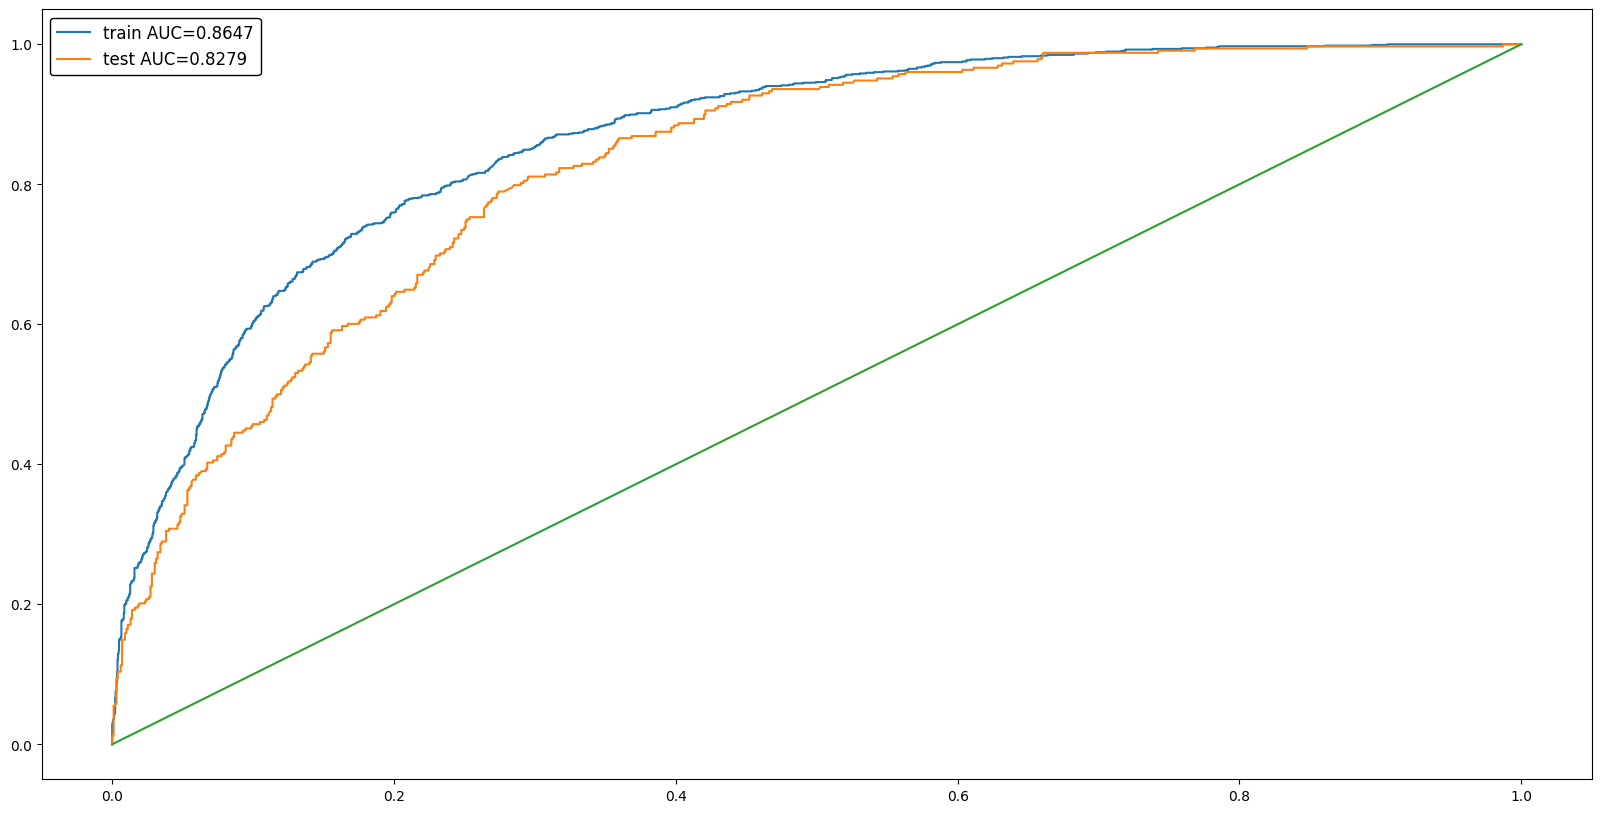

In [52]:
# Финализируем и тестируем метомодель

stacking_model = LogisticRegression(**CV_model.best_params_)
stacking_model.fit(meta_features_train, train[target_col])

y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_valid_predicted = stacking_model.predict_proba(meta_features_valid)[:, 1]

train_auc = roc_auc_score(train[target_col], y_train_predicted)
test_auc = roc_auc_score(valid[target_col], y_valid_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(train[target_col], y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(valid[target_col], y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

---

### * Обучаем модель на всех доступных данных

In [53]:
df_full = data.copy()
print(df_full.shape)
df_full.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [54]:
# Обучение и обработка признаков для использования в логистической регрессии

print('1) Трансформация и обработка факторов')
df_full[[f'{i}_sc' for i in num_cols]] = scl.fit_transform(df_full[num_cols])
df_full = df_full.join(pd.DataFrame(ohe.fit_transform(df_full[cat_cols]),columns=ohe.get_feature_names()))
cols = [f'{i}_sc' for i in num_cols] + ohe.get_feature_names().tolist()
print('-'*100)

print('2) Поиск гиперпараметров и обучение лучшей модели LogisticRegression')
params_logreg = {'random_state':42}
model_logreg = LogisticRegression(**params_logreg)
CV_model = GridSearchCV(estimator=model_logreg,
                        param_grid=parameters,
                        cv=4,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=0)

CV_model.fit(df_full[cols], df_full[target_col])
params_logreg.update(CV_model.best_params_)
print(f'Финальные параметры модели: {params_logreg}')
best_logreg = LogisticRegression(**params_logreg)
best_logreg.fit(df_full[cols], df_full[target_col])
print('-'*100)

print('3) Обучение лучшей модели CatBoostClassifier')
print(f'Финальные параметры модели: {params_ctb}')
best_ctb = ctb.CatBoostClassifier(**params_ctb)
best_ctb.fit(X=df_full[feature_cols],
              y=df_full[target_col],
              cat_features=cat_cols
             )
print('-'*100)

print('4) Создание метафичей, поиск оптимальных параметров и обучение стеккинг алгоритма')
meta_features_df = pd.DataFrame({'logreg_proba':best_logreg.predict_proba(df_full[cols])[:, 1],
                                 'ctb_proba':best_ctb.predict_proba(df_full[feature_cols])[:, 1]
                                   })

CV_model = GridSearchCV(estimator=model_logreg,
                        param_grid=meta_parameters,
                        cv=4,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=0)

CV_model.fit(meta_features_df, df_full[target_col])
best_meta_parameters = CV_model.best_params_
best_meta_parameters['random_state'] = 42
print(f'Финальные параметры модели: {best_meta_parameters}')
best_model = LogisticRegression(**best_meta_parameters)
best_model.fit(meta_features_df,df_full[target_col])
print('-'*100)
print('ОБУЧЕНИЕ завершено')

1) Трансформация и обработка факторов
----------------------------------------------------------------------------------------------------
2) Поиск гиперпараметров и обучение лучшей модели LogisticRegression


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Финальные параметры модели: {'random_state': 42, 'C': 10}
----------------------------------------------------------------------------------------------------
3) Обучение лучшей модели CatBoostClassifier
Финальные параметры модели: {'eval_metric': 'AUC', 'thread_count': -1, 'depth': 4, 'iterations': 362, 'l2_leaf_reg': 100, 'learning_rate': 0.03, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'random_seed': 42, 'subsample': 0.9}
----------------------------------------------------------------------------------------------------
4) Создание метафичей, поиск оптимальных параметров и обучение стеккинг алгоритма
Финальные параметры модели: {'C': 100, 'penalty': 'l1', 'random_state': 42}
----------------------------------------------------------------------------------------------------
ОБУЧЕНИЕ завершено


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


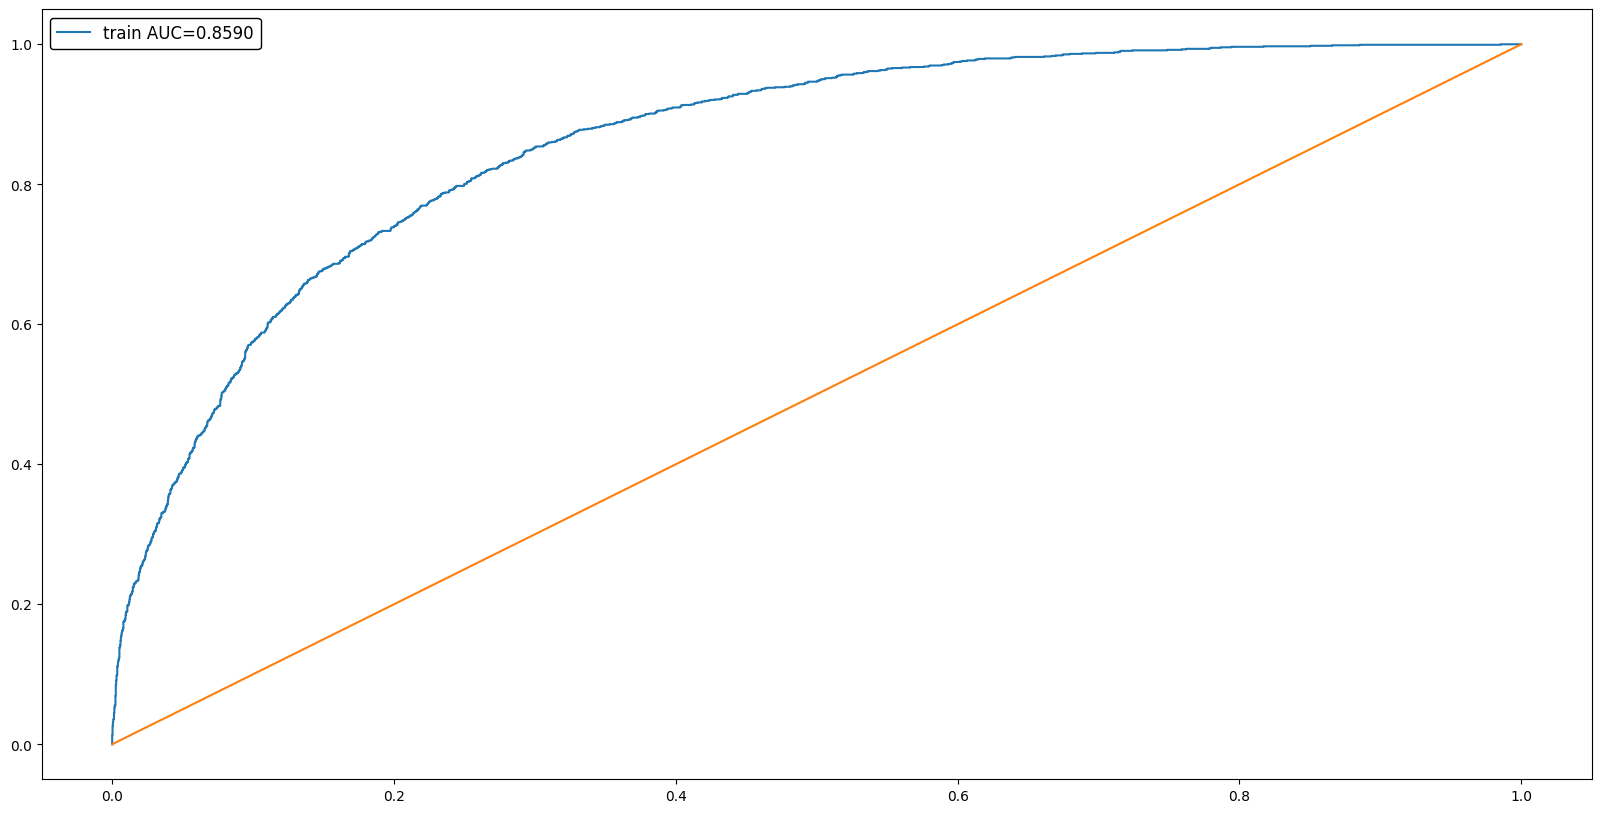

In [55]:
y_predicted = best_model.predict_proba(meta_features_df)[:, 1]
train_auc = roc_auc_score(df_full[target_col], y_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(df_full[target_col], y_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

---
## Выводы по четвертой части: 

* Обучили оптимальную логистическую регрессию
* Обучили оптимальный бустинг
* Применили к тренировочному и валидационному множеству -> создали метофакторы (стеккинг двух моделей)
* Обучили метомодель на всех доступных данных
---
* Как итог модель ведет себя стабильно

# Предсказания

In [56]:
best_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
X_test = pd.read_csv('./test.csv')
print(X_test.shape)
X_test.head()

(1761, 19)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [58]:
submission = pd.read_csv('./submission.csv')
print(submission.shape)
submission.head()

(1761, 2)


,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [59]:
X_test.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [60]:
# Преобразование

X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: np.nan if x == ' ' else np.float(x))
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(data['TotalSpent'].median())
X_test[[f'{i}_sc' for i in num_cols]] = scl.transform(X_test[num_cols])
X_test = X_test.join(pd.DataFrame(ohe.transform(X_test[cat_cols]),columns=ohe.get_feature_names()))

In [61]:
# Применение

meta_features_test = pd.DataFrame({'logreg_proba':best_logreg.predict_proba(X_test[cols])[:, 1],
                                   'ctb_proba':best_ctb.predict_proba(X_test[feature_cols])[:, 1]
                                  })
submission['Churn'] = best_model.predict_proba(meta_features_test)[:, 1]
submission.to_csv('./my_submission_2.csv',index=False)

Лучшее решение отправьте в Stepik.

In [62]:
pd.read_csv('my_submission_2.csv')

,Id,Churn
0,0,0.055661
1,1,0.760504
2,2,0.719218
3,3,0.050729
4,4,0.048690
...,...,...
1756,1756,0.100531
1757,1757,0.050723
1758,1758,0.888839
1759,1759,0.526301
